In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]], dtype=float)
y = np.array([[0], [1], [1], [0]], dtype=float)

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [5]:
def sigmoid_derivative(a):
    return a * (1.0 - a)

In [7]:
np.random.seed(42)

In [8]:
input_neurons  = 2
hidden_neurons = 2
output_neurons = 1

In [9]:
wh   = np.random.uniform(low=-1.0, high=1.0, size=(input_neurons,  hidden_neurons))
bh   = np.random.uniform(low=-1.0, high=1.0, size=(1, hidden_neurons))
wout = np.random.uniform(low=-1.0, high=1.0, size=(hidden_neurons, output_neurons))
bout = np.random.uniform(low=-1.0, high=1.0, size=(1, output_neurons))

In [10]:
lr = 0.1

In [11]:
epochs = 10_000

In [12]:
for epoch in range(epochs):
    hidden_input  = np.dot(X, wh) + bh
    hidden_output = sigmoid(hidden_input)
    final_input   = np.dot(hidden_output, wout) + bout
    final_output  = sigmoid(final_input)

    error = y - final_output
    loss = np.mean(error ** 2)

    d_output = error * sigmoid_derivative(final_output)
    error_hidden = np.dot(d_output, wout.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    wout += np.dot(hidden_output.T, d_output) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    wh   += np.dot(X.T, d_hidden) * lr
    bh   += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss:.6f}")

Epoch     0 | Loss: 0.254485
Epoch  1000 | Loss: 0.250004
Epoch  2000 | Loss: 0.249309
Epoch  3000 | Loss: 0.242221
Epoch  4000 | Loss: 0.173945
Epoch  5000 | Loss: 0.048031
Epoch  6000 | Loss: 0.016498
Epoch  7000 | Loss: 0.008891
Epoch  8000 | Loss: 0.005874
Epoch  9000 | Loss: 0.004318


In [16]:
print("\nTrained outputs (probabilities):")
hidden_output = sigmoid(np.dot(X, wh) + bh)
final_output  = sigmoid(np.dot(hidden_output, wout) + bout)
print(final_output.round(4))


Trained outputs (probabilities):
[[0.0616]
 [0.9442]
 [0.9442]
 [0.0593]]


In [17]:
print("\nPredictions (threshold 0.5):")
print((final_output > 0.5).astype(int).ravel())


Predictions (threshold 0.5):
[0 1 1 0]


In [18]:
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

In [19]:
hidden_grid = sigmoid(np.dot(grid, wh) + bh)
output_grid = sigmoid(np.dot(hidden_grid, wout) + bout).reshape(xx.shape)

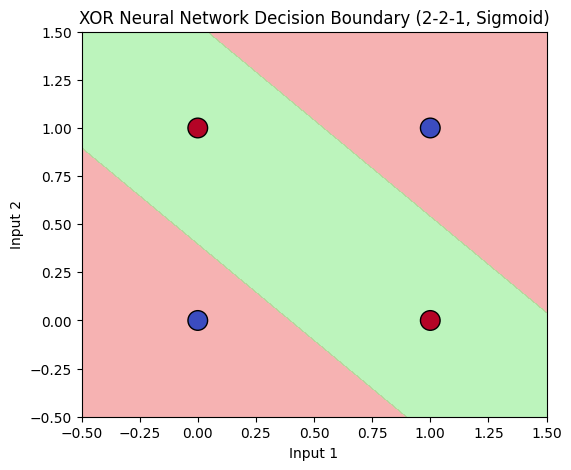

In [20]:
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, output_grid, levels=[-0.1, 0.5, 1.1],
             colors=['lightcoral', 'lightgreen'], alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=200, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("XOR Neural Network Decision Boundary (2-2-1, Sigmoid)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()